In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
 #Reading the dataset (txt file)
df = pd.read_csv("household_power_consumption.txt", delimiter=';', na_values='?')

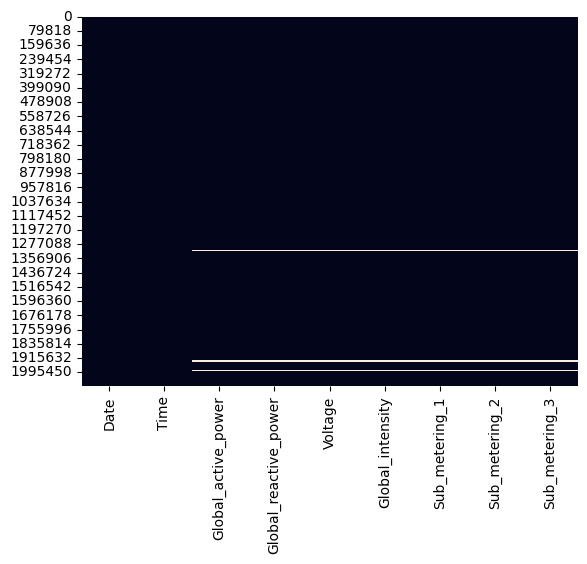

In [3]:
# Data visualization
sns.heatmap(df.isnull(), cbar=False)  # Visualize missing values
plt.show()

In [4]:
# Encoding
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12308\2958990418.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
# Descriptive statistics
print(df.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

In [19]:
# Extracting the input features and target variable
X = df[['Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

In [20]:
# Handling Null Values
X = X.dropna()
y = y[X.index]

In [21]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
linear_pred = linear_model.predict(X_test)


In [29]:
# Train an XGB Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

In [36]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [37]:
# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate linear regression model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2) Score:", linear_r2)

Linear Regression Metrics:
Mean Squared Error (MSE): 0.0018048510362474114
Root Mean Squared Error (RMSE): 0.04248353841486619
Mean Absolute Error (MAE): 0.027138585467910953
R-squared (R2) Score: 0.998365740219586


In [39]:
# Evaluate XGB Regressor model
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGB Regressor Metrics:")
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("Mean Absolute Error (MAE):", xgb_mae)
print("R-squared (R2) Score:", xgb_r2)


XGB Regressor Metrics:
Mean Squared Error (MSE): 3.994307915145391e-06
Root Mean Squared Error (RMSE): 0.001998576472178483
Mean Absolute Error (MAE): 0.0013712860352856151
R-squared (R2) Score: 0.9999963832268453


In [40]:
# Evaluate Random Forest Regressor model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor Metrics:")
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2) Score:", rf_r2)

Random Forest Regressor Metrics:
Mean Squared Error (MSE): 1.1044615132566399e-08
Root Mean Squared Error (RMSE): 0.00010509336388453078
Mean Absolute Error (MAE): 1.0241608358432137e-06
R-squared (R2) Score: 0.999999989999302


In [25]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(linear_model,X,y,cv=5)

In [26]:
np.mean(cv)

0.9982971156884088

In [27]:
import pickle
filename='PCASS_model.pkl'
pickle.dump(linear_model,open(filename,'wb'))

In [28]:
model=pickle.load(open('PCASS_model.pkl', 'rb'))
print(model.predict([[.481, 18.4, 0.0, 1.0, 17.0]]))

[4.31179297]


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
